In [277]:
########################################################
#  Developed by Jonathan Ojeda 10-12-2020 QAAFI UQ
#  Functionalities:
#  - Plot global map from shp file with iso_a3 codes
#  - Edit legend in the map
#  - Create bar plots 
########################################################

In [278]:
#Import required packages
import os
os.environ["PROJ_LIB"] = r'C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\Library\share'; #fixr
from mpl_toolkits.basemap import Basemap

import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import dateutil
import pylab as py
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, maskoceans
import shapefile
import pandas as pd
import geopandas as gpd
import georaster
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os,csv,json,sys,shutil,random
import json, csv, math

#Extend Python window to work better
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [279]:
#import locally saved file
data = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Francesco\Review\map\Countries.csv', sep=',', encoding='latin-1')

#import world shape map externally, no need to have a saved file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = world[(world.name!="Antarctica")]
#world.head()
#world.info()

In [280]:
#merge both data sets using country code/iso_a3 as unique identifiers
#for_plotting = world.merge(data, left_on = 'ISO3', right_on = 'Country Code')
for_plotting = pd.merge(world, data, on = ['iso_a3'], how='outer')
#check the occurrence
#for_plotting['size'].fillna(0, inplace=True)

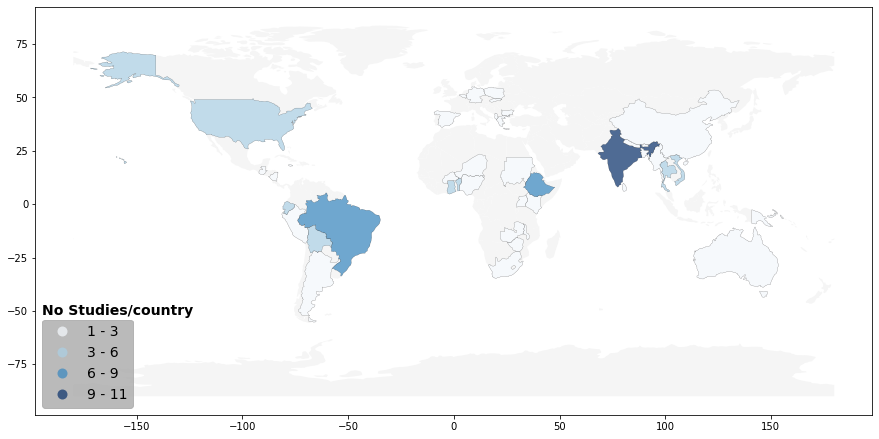

In [281]:
from matplotlib.patches import Patch
import pylab as plot
## first layer, all geometries included 
ax = for_plotting.plot(color="whitesmoke",figsize=(15,10))

#plot merged file. use dropna to remove any country with no value
fig = for_plotting.dropna().plot(ax=ax, column='size', cmap ='Blues', scheme='user_defined',alpha=0.7,
                                k=4, legend=True, edgecolor='black',linewidth=0.2, classification_kwds={'bins':[3, 6,9, 11]})

#Remove decimals in the legend

leg = fig.get_legend()
leg._loc = 3

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    label_text = label_text[1:-1].split(', ')
    lower = label_text[0]
    upper = label_text[1]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

leg.get_frame().set_color("darkgrey")

params = {'legend.fontsize': 8}
plot.rcParams.update(params)

leg = fig.get_legend()
leg._loc = 3
leg.get_frame().set_color("darkgrey")

params = {'legend.fontsize': 14}
plot.rcParams.update(params)

a13=plt.text(-195, -52, "No Studies/country", size=14, weight='bold')

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Francesco\Review\map\map.png', dpi=600, bbox_inches='tight')

No handles with labels found to put in legend.


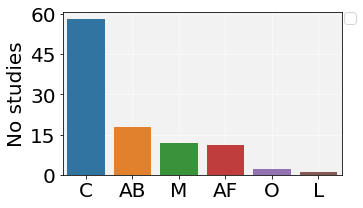

In [241]:
#import locally saved file
diversity = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Francesco\Review\map\diversity.csv', sep=',', encoding='latin-1')

# Apply order accordingly with mean yield
grouped = diversity.groupby("DiversityType")
users_sorted_average = pd.DataFrame({col:vals['Frequency'] for col,vals in grouped}).mean().sort_values(ascending=False)

fig = plt.figure(figsize=(5,3))

ax=plt.subplot(1, 1, 1)

sns.barplot(x="DiversityType", y="Frequency", data=diversity, linewidth=0.4,order=users_sorted_average.index)
plt.setp(ax.collections, alpha=.4)

# Formatting graph and background
plt.legend(prop=dict(size=15),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('No studies', fontsize =20)
plt.xlabel('', fontsize =13)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.95')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))
#ax.set_ylim([75,260])

plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Francesco\Review\map\barplot1.png', dpi=300, bbox_inches='tight', pad_inches=0.0)

No handles with labels found to put in legend.


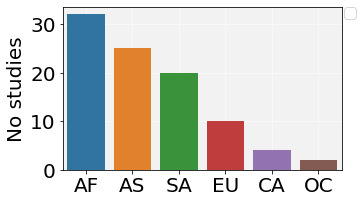

In [242]:
#import locally saved file
cont = pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Francesco\Review\map\Continents.csv')

# Apply order accordingly with mean yield
grouped = cont.groupby("cont")
users_sorted_average = pd.DataFrame({col:vals['freq'] for col,vals in grouped}).mean().sort_values(ascending=False)

fig = plt.figure(figsize=(5,3))

ax=plt.subplot(1, 1, 1)

sns.barplot(x="cont", y="freq", data=cont, linewidth=0.4,order=users_sorted_average.index)
plt.setp(ax.collections, alpha=.4)

# Formatting graph and background
plt.legend(prop=dict(size=15),bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('No studies', fontsize =20)
plt.xlabel('', fontsize =13)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.95')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.set_ylim([75,260])

plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Francesco\Review\map\barplot2.png', dpi=300, bbox_inches='tight', pad_inches=0.0)